<a href="https://colab.research.google.com/github/uditnm/Data-Science-assignments/blob/main/DS_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')

In [ ]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = dataset.iloc[:,[3,4]].values

In [ ]:
X.shape


(200, 2)

In [ ]:
import scipy.cluster.hierarchy as sch

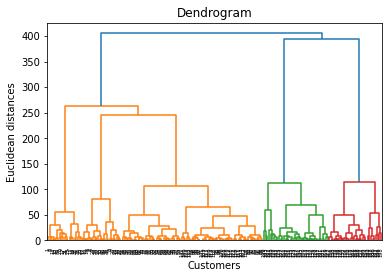

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(X)

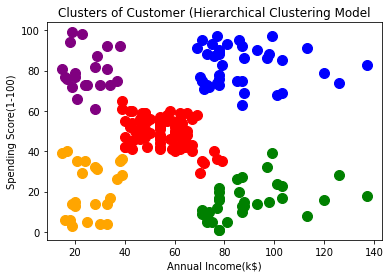

In [ ]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Customer (Hierarchical Clustering Model')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

## Topic Modelling

In [ ]:
data  = pd.read_csv('/content/drive/MyDrive/DS assignment datasets/papers.csv')

In [ ]:
data.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
papers = data.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

In [ ]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x))

In [ ]:

#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

1200    kernel feature spaces and\nnonlinear blind sou...
3045    a delay-line based\nmotion detection chip\n\nt...
5073    distributed variational inference in sparse ga...
4893    recognition of manipulated objects\nby motor l...
2585    nearest-neighbor-based active learning for rar...
Name: paper_text_processed, dtype: object

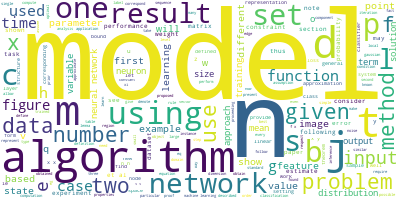

In [ ]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
#Prepare text for LDA
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [ ]:

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['kernel', 'feature', 'spaces', 'nonlinear', 'blind', 'source', 'separation', 'stefan', 'harmeling', 'andreas', 'ziehe', 'motoaki', 'kawanabe', 'klaus', 'robert', 'mller', 'fraunhofer', 'firstida', 'kekulstr', 'berlin', 'germany', 'university', 'potsdam', 'department', 'computer', 'science', 'august', 'bebel', 'strasse', 'potsdam']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 20), (12, 1), (13, 7), (14, 1), (15, 5), (16, 1), (17, 6), (18, 1), (19, 1), (20, 1), (21, 1), (22, 9), (23, 1), (24, 2), (25, 1), (26, 3), (27, 1), (28, 2), (29, 2)]


In [ ]:
#LDA Model Training
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"algorithm" + 0.005*"model" + 0.005*"set" + 0.005*"learning" + '
  '0.004*"one" + 0.004*"data" + 0.004*"problem" + 0.003*"function" + '
  '0.003*"two" + 0.003*"log"'),
 (1,
  '0.006*"data" + 0.006*"model" + 0.005*"algorithm" + 0.005*"learning" + '
  '0.005*"function" + 0.004*"using" + 0.004*"two" + 0.004*"one" + 0.004*"set" '
  '+ 0.003*"problem"'),
 (2,
  '0.006*"algorithm" + 0.006*"learning" + 0.005*"network" + 0.005*"data" + '
  '0.005*"model" + 0.004*"using" + 0.004*"function" + 0.004*"set" + '
  '0.004*"neural" + 0.004*"time"'),
 (3,
  '0.008*"model" + 0.006*"network" + 0.005*"using" + 0.004*"one" + '
  '0.004*"data" + 0.004*"function" + 0.004*"neural" + 0.004*"figure" + '
  '0.004*"learning" + 0.004*"algorithm"'),
 (4,
  '0.006*"learning" + 0.005*"data" + 0.005*"set" + 0.004*"model" + '
  '0.004*"algorithm" + 0.004*"using" + 0.004*"function" + 0.004*"one" + '
  '0.003*"results" + 0.003*"figure"'),
 (5,
  '0.007*"model" + 0.006*"learning" + 0.005*"algorithm" + 0.005*

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=03129c952691f30856358a460b397afe5ace0fa240ab11fe7894aed29463ef02
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=3e4fcabbe4f9a2fdfa12c4d3d59805918c0944773e1f3498a8cc69d1e477a8c8
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:

import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import os
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.013810  0.004804       1        1  16.487132
0      0.001811 -0.004090       2        1  12.520334
9      0.000468 -0.006495       3        1  11.776569
3      0.004878  0.009449       4        1  11.517903
7      0.006075  0.002121       5        1  11.074652
1      0.001384 -0.009365       6        1  10.524072
4     -0.004553 -0.001220       7        1   8.087901
6      0.003877  0.001323       8        1   7.379656
5      0.003354  0.004708       9        1   5.493250
8     -0.003485 -0.001234      10        1   5.138532, topic_info=          Term         Freq        Total Category  logprob  loglift
933      model  1290.000000  1290.000000  Default  30.0000  30.0000
324   learning  1132.000000  1132.000000  Default  29.0000  29.0000
603       time   776.000000   776.000000  Default  28.0000  28.0000
406        one   809.000000   809.000000  Default  27.0000  27.0000
129       data  1041.000000  1041.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
385   networks    24.279108   513.185757  Topic10  -6.1546  -0.0826
1519   network    28.965313   808.120441  Topic10  -5.9781  -0.3602
629       used    24.712131   547.989399  Topic10  -6.1369  -0.1306
69        case    23.046255   508.157323  Topic10  -6.2067  -0.1249
44       based    22.396579   499.253657  Topic10  -6.2353  -0.1358

[861 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
5106       3  0.186068        abeles
5106       4  0.186068        abeles
5106       5  0.186068        abeles
5106       7  0.186068        abeles
6687       1  0.160471  acceleration
...      ...       ...           ...
3505       7  0.058022            zi
3505       8  0.041444            zi
3505       9  0.099466            zi
3505      10  0.033155            zi
10602      8  0.289008         zweig

[3988 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 10, 4, 8, 2, 5, 7, 6, 9])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')